### **About EDA notebook**

#### **Problem Statement**
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#### Attributes
 **People**<br>
ID: Customer's unique identifier <br>
Year_Birth: Customer's birth year <br>
Education: Customer's education level <br>
Marital_Status: Customer's marital status <br>
Income: Customer's yearly household income<br>
Kidhome: Number of children in customer's household<br>
Teenhome: Number of teenagers in customer's household<br>
Dt_Customer: Date of customer's enrollment with the company<br>
Recency: Number of days since customer's last purchase<br>
Complain: 1 if customer complained in the last 2 years, 0 otherwise<br>

**Products**<br>
MntWines: Amount spent on wine in last 2 years<br>
MntFruits: Amount spent on fruits in last 2 years<br>
MntMeatProducts: Amount spent on meat in last 2 years<br>
MntFishProducts: Amount spent on fish in last 2 years<br>
MntSweetProducts: Amount spent on sweets in last 2 years<br>
MntGoldProds: Amount spent on gold in last 2 years<br>

**Promotion**<br>
NumDealsPurchases: Number of purchases made with a discount<br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

**Place**<br>
NumWebPurchases: Number of purchases made through the company’s web site<br>
NumCatalogPurchases: Number of purchases made using a catalogue<br>
NumStorePurchases: Number of purchases made directly in stores<br>
NumWebVisitsMonth: Number of visits to company’s web site in the last month<br>

**Target**<br>
Need to perform clustering to summarize customer segments.
##### **Customer Personality Analysis is a powerful tool for businesses to:**
1. Understand their customers better: By segmenting customers based on personality traits and behaviors, businesses can gain valuable insights into their needs, preferences, and pain points. <br>
2. Improve customer experience: By tailoring their approach to different customer segments, businesses can create a more personalized and positive experience for each customer. <br>
3. Increase marketing efficiency: By focusing marketing efforts on the customer segments most likely to buy a product, businesses can save money and get a better return on investment. <br>

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [136]:
# Set matplotlib style and lay-out
plt.style.use('fast')

In [137]:
raw_data =pd.read_csv("/Users/pongsathornphakdeethai/Desktop/Lion's Projects/Customer Personal Analysis and Clustering/marketing_campaign.csv", sep='\t')

In [138]:
df = raw_data.copy()
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [140]:
print(f"dataset size: {df.shape}")

dataset size: (2240, 29)


In [141]:
# Check for missing values
df.isna().sum()[df.isna().sum() > 0]

Income    24
dtype: int64

**From above we can see that:**
<br>
- The dataset is quite clean, only 24 missing values in "Income" column.
- The data types are mostly correct for all columns except for "Dt_Customer" -> we will later convert this to datetime type.
- Another thing I notice is there is customers' birth year column, we can potentially add a new column for age of the customer. Normally it's more useful to use age than birth year.
- Also potentially the age of customers when they joined the company could be useful. We can add a new column for that as well.
- The dataset contains information about customer's basic information, the products they bought, the place customers bought the products from and how they use the promotions.

In [142]:
df[pd.isna(df['Income'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [143]:
# Check if there is any duplicate data
df.duplicated().sum()

0

In [144]:
# convert the date columns to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [145]:
df["Marital_Status"].astype(str)

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2240, dtype: object

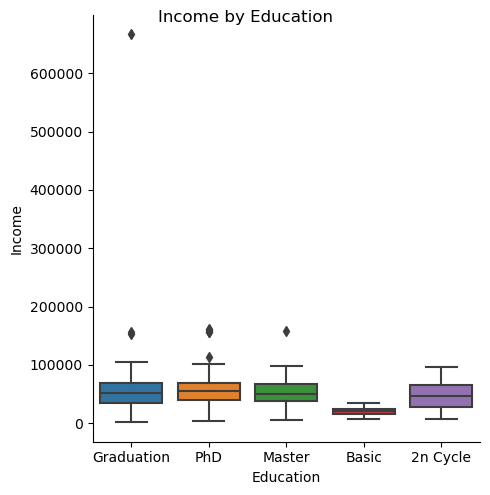

In [146]:
# lets look income by education, this might give us some insights how we can fill the missing values
d = sns.catplot(x='Education', y='Income', kind='box', data=df)
d.figure.set_size_inches(5, 5)
d.figure.suptitle('Income by Education')
plt.show()

In [147]:
# for missing income, we will fill it up with the median income of the respective education level
df.fillna(df[['Income', 'Education']].groupby('Education').transform('median'), inplace=True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [148]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

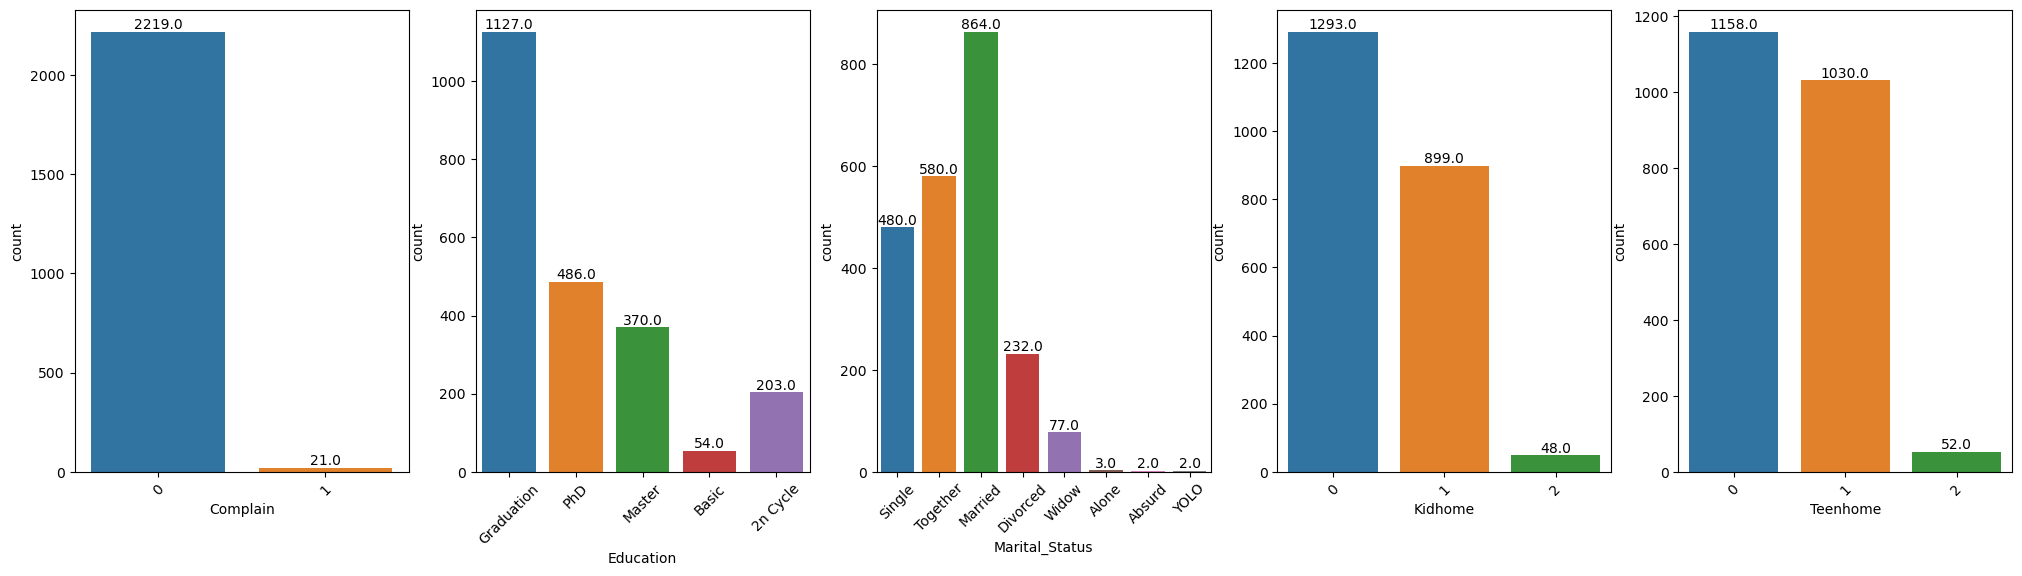

In [149]:
# The features that are categorical Graph
cal_cols = ['Complain', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']
fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 6))
for i, col in enumerate(cal_cols):
    sns.countplot(data=df, x=col, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=45)
    
    # Annotate each bar with its count value
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

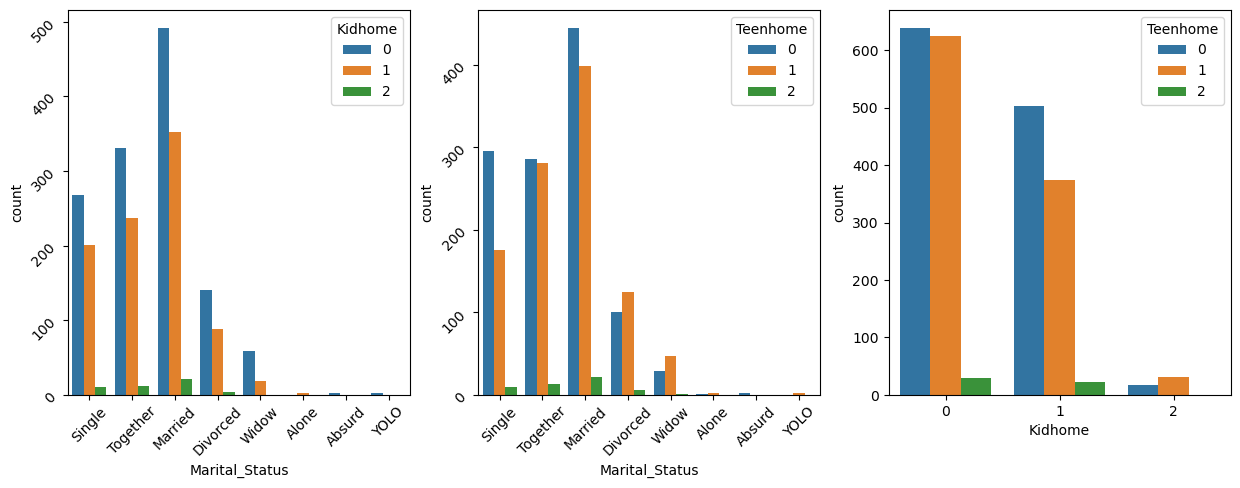

In [150]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# At first we have an error "AttributeError: 'numpy.int64' object has no attribute 'startswith'"
# So we convert dtype from int to str before we use "countplot"
df["Kidhome"] = df["Kidhome"].astype(str)
df["Teenhome"] = df["Teenhome"].astype(str)

# Plot count plots for Marital_Status vs Kidhome and Marital_Status vs Teenhome
sns.countplot(data=df, x="Marital_Status", hue="Kidhome", ax=ax[0])
sns.countplot(data=df, x="Marital_Status", hue="Teenhome", ax=ax[1])

# Plot count plot for Kidhome vs Teenhome
sns.countplot(data=df, x="Kidhome", hue="Teenhome", ax=ax[2])

# Rotate x-axis labels for better readability
ax[0].tick_params(rotation=45)
ax[1].tick_params(rotation=45)

plt.show()

# convert dtype back
df["Kidhome"] = df["Kidhome"].astype(int)
df["Teenhome"] = df["Teenhome"].astype(int)

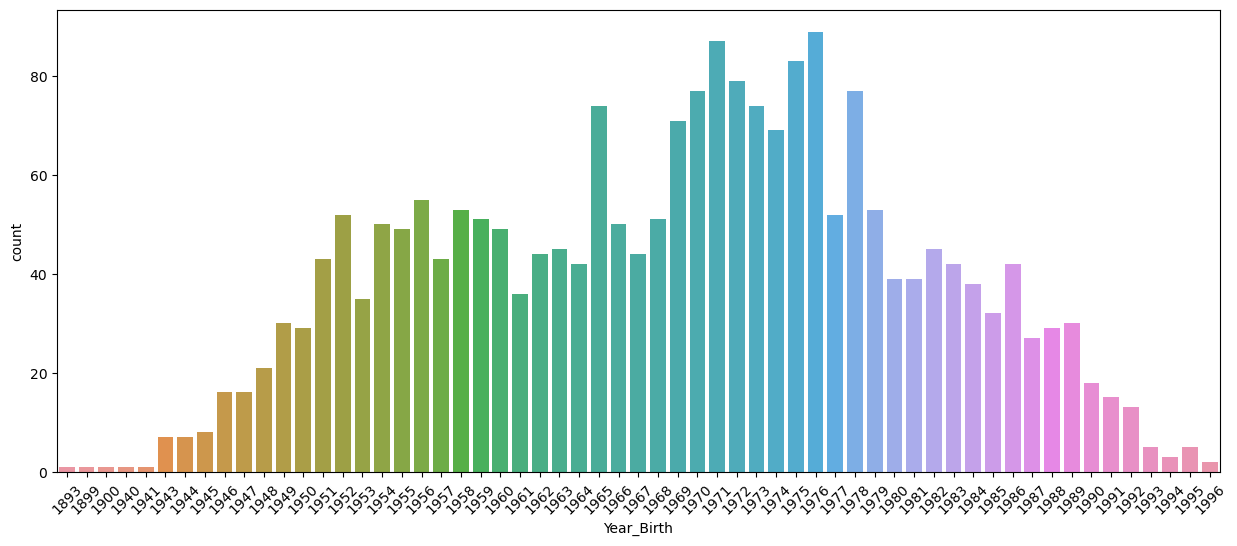

In [151]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=df, x='Year_Birth')
plt.xticks(rotation=45)

plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

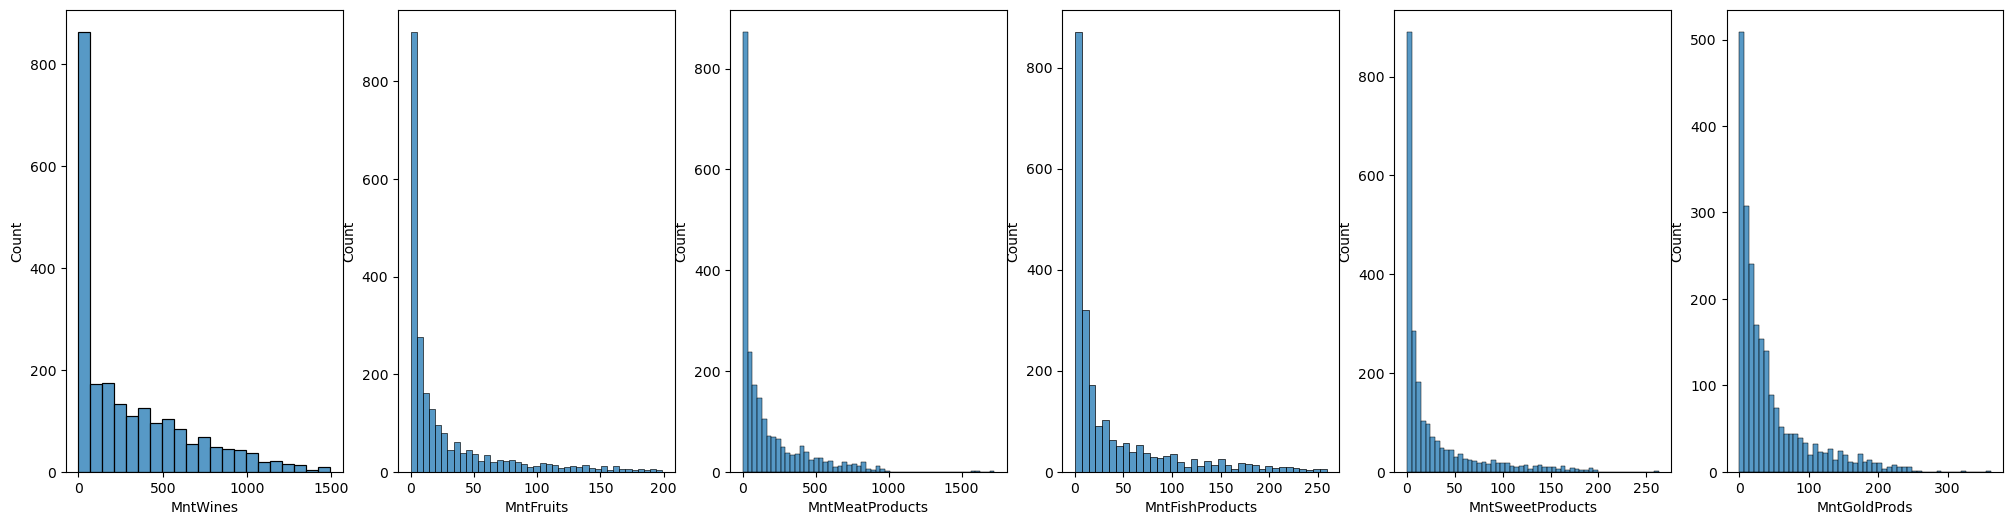

In [152]:
amount_fea = df.columns[df.columns.map(lambda x: 'Mnt' in x)].to_list()
fig, ax = plt.subplots(1, len(amount_fea), figsize=(25, 6))
for col in enumerate(amount_fea):
    sns.histplot(data=df, x=col[1], ax=ax[col[0]])

plt.show()

['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']


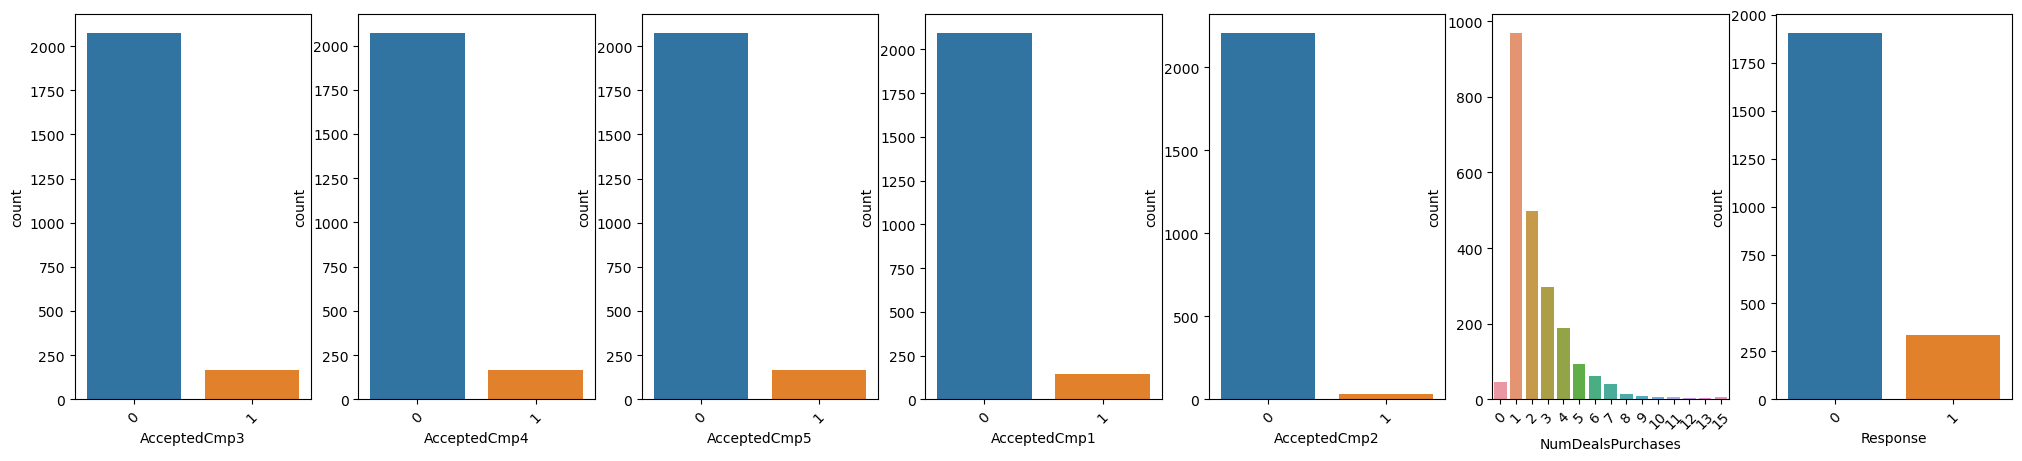

In [153]:
# accected promotion features
promo_fea = df.columns[(df.columns.map(lambda x: 'Accepted' in x))].to_list()
print(promo_fea)
promo_fea.append('NumDealsPurchases')
promo_fea.append('Response')

fig, ax = plt.subplots(1, len(promo_fea), figsize=(25, 5))
for col in enumerate(promo_fea):
    sns.countplot(data=df, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)
plt.show()

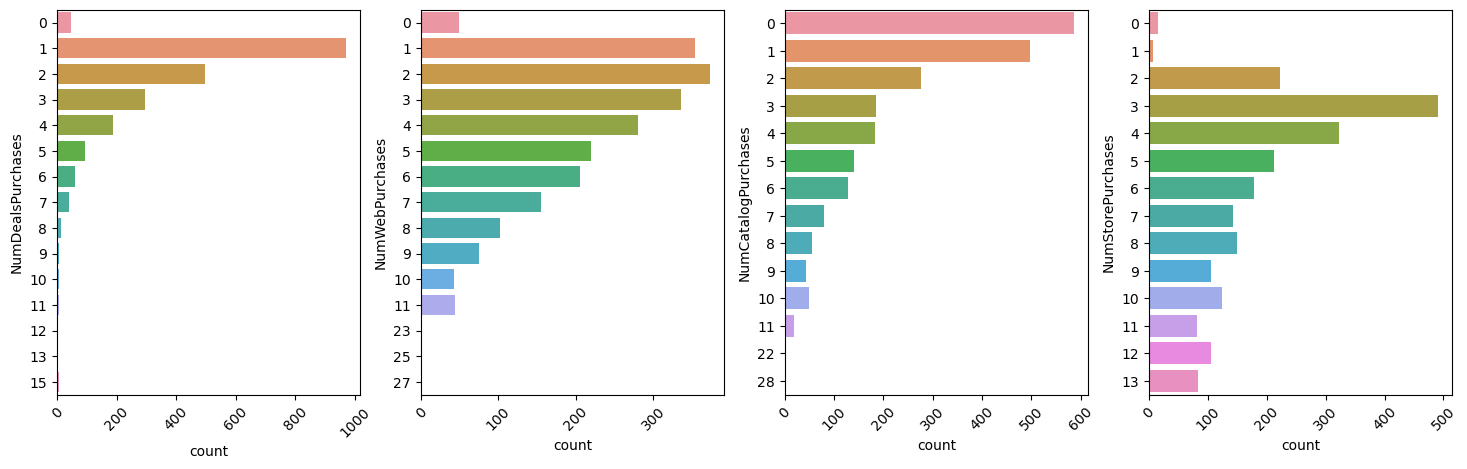

In [154]:
place_fea = df.columns[(df.columns.map(lambda x: 'Purchases' in x))].to_list()
place_fea

fig, ax = plt.subplots(1, len(place_fea), figsize=(18, 5))
for col in enumerate(place_fea):
    sns.countplot(data=df, y=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)

<Axes: xlabel='NumWebPurchases', ylabel='NumCatalogPurchases'>

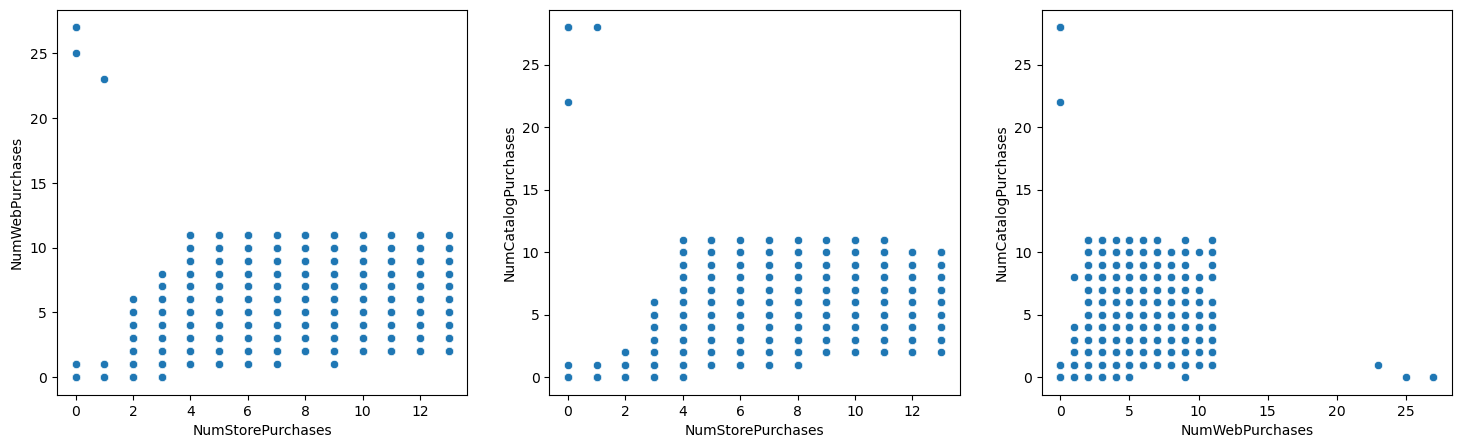

In [155]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x='NumStorePurchases', y='NumWebPurchases', ax=ax[0])
sns.scatterplot(data=df, x='NumStorePurchases', y='NumCatalogPurchases', ax=ax[1])
sns.scatterplot(data=df, x='NumWebPurchases', y='NumCatalogPurchases', ax=ax[2])

In [156]:
# adding a few features 
df['age_at_enroll'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['been_customer_for_days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df['num_children'] = df['Kidhome'] + df['Teenhome']
df['has_children'] = df.apply(lambda x : 1 if x['num_children'] > 0 else 0, axis=1)
df['num_total_purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['total_Mnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [157]:
# add a new column accepted any compaign
df['accepted_any_cmp'] = df.apply(lambda x: x['AcceptedCmp1'] or x['AcceptedCmp2'] or x['AcceptedCmp3'] or x['AcceptedCmp4'] or x['AcceptedCmp5'] or x['Response'], axis=1)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


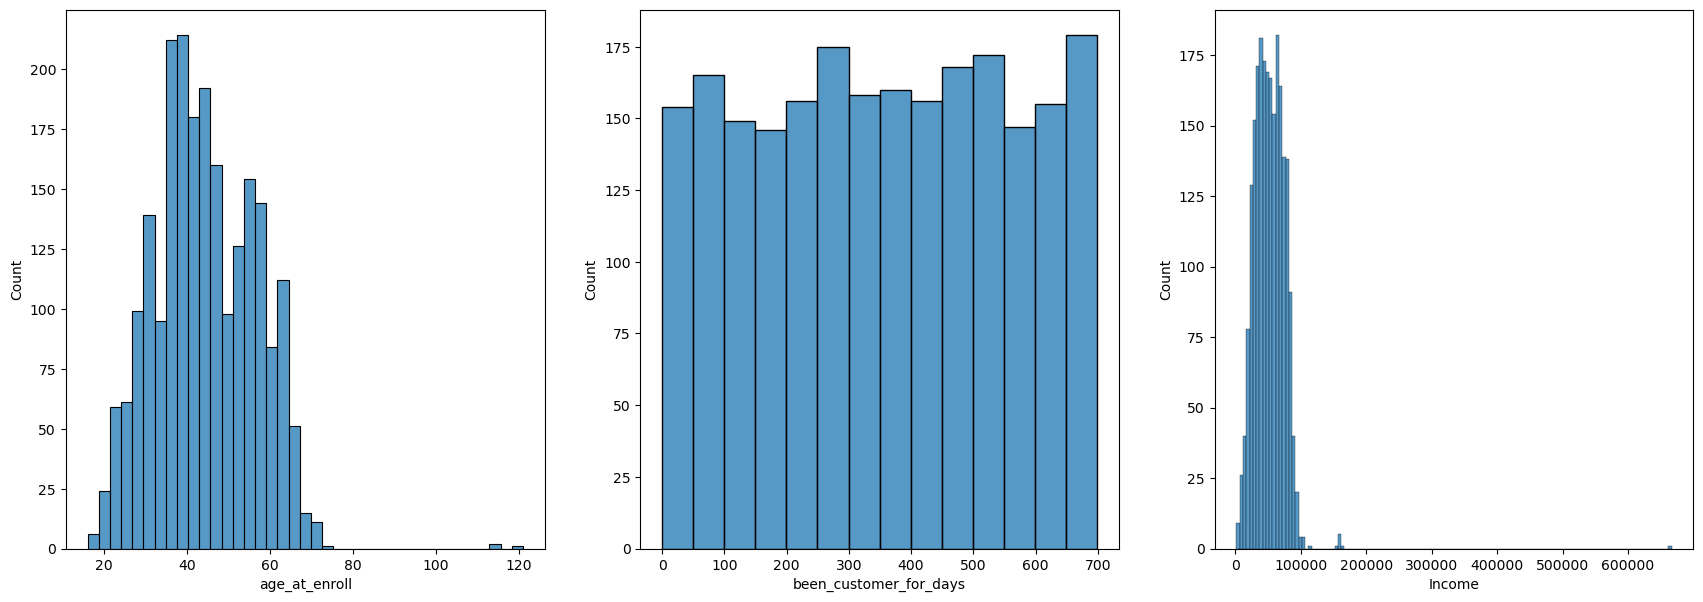

In [158]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))  # Unpack the axes
plots = [
    sns.histplot(df['age_at_enroll'], ax=ax1),
    sns.histplot(df['been_customer_for_days'], ax=ax2),
    sns.histplot(df['Income'], ax=ax3)
]

In [159]:
# There are some outliers 
df = df.drop(df[df['age_at_enroll'] > 80].index, axis=0)
df = df.drop(df[df['Income'] > 150000 ].index, axis=0)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


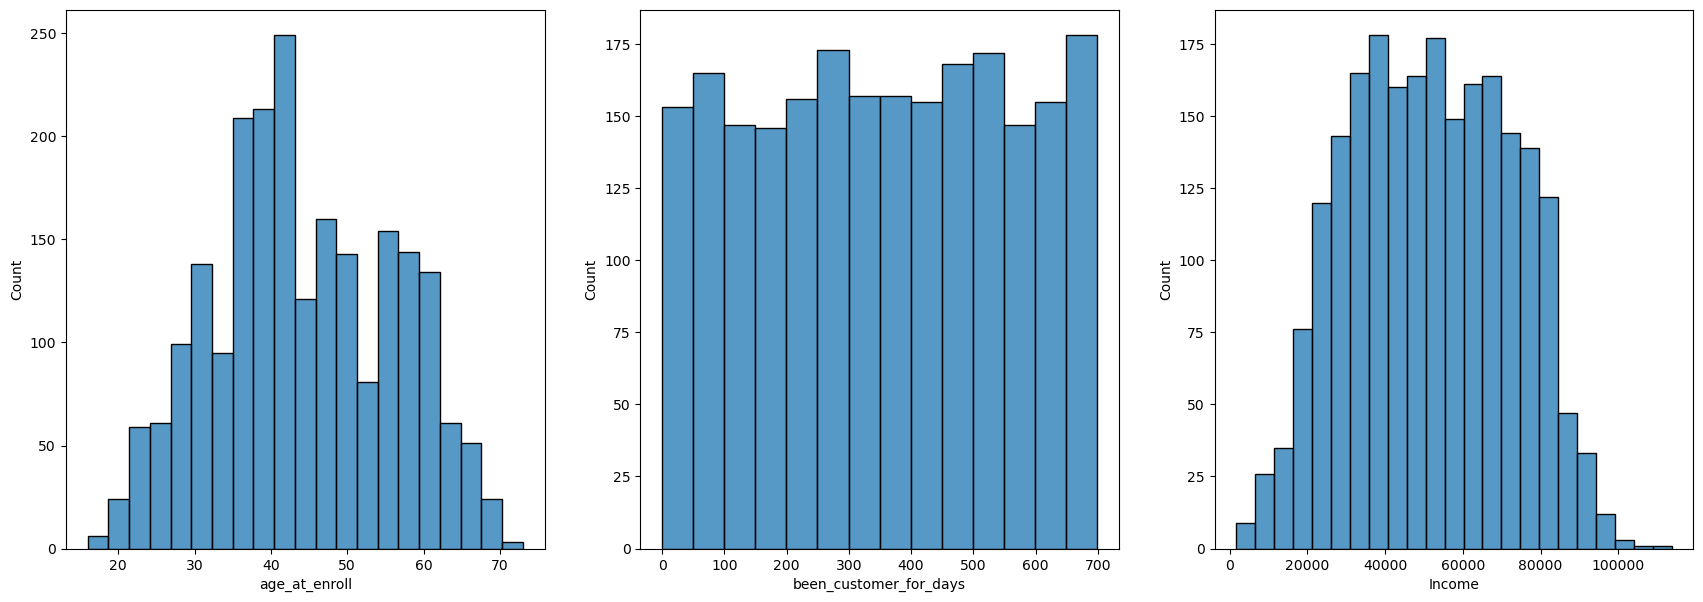

In [160]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))  # Unpack the axes
plots = [
    sns.histplot(df['age_at_enroll'], ax=ax1),
    sns.histplot(df['been_customer_for_days'], ax=ax2),
    sns.histplot(df['Income'], ax=ax3)
]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_Mnt', ylabel='Count'>

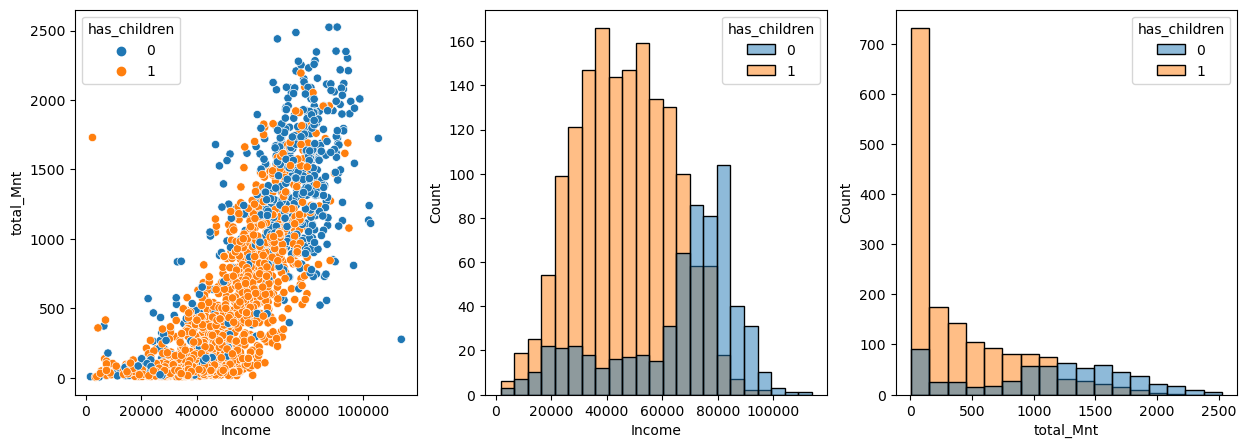

In [161]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df, x='Income', y='total_Mnt', hue='has_children', ax=ax[0])
sns.histplot(data=df, x='Income', hue='has_children', ax=ax[1])
sns.histplot(data=df, x='total_Mnt', hue='has_children', ax=ax[2])

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

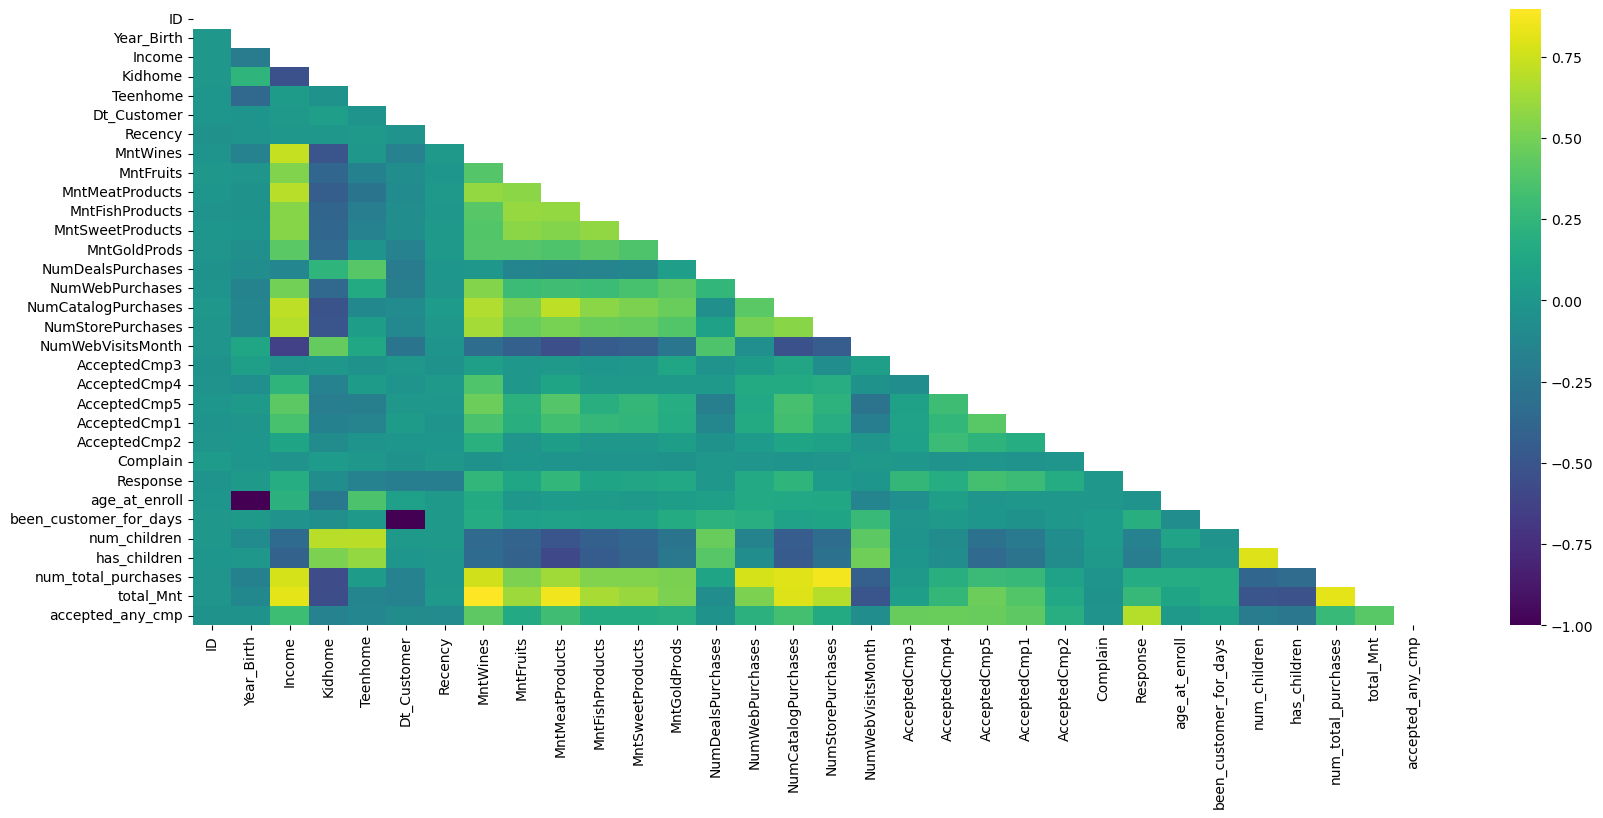

In [162]:
fig, ax = plt.subplots(figsize=(20, 8))
correlation = df[df.columns[(df.dtypes != 'object') & (~df.columns.isin(['Z_CostContact', 'Z_Revenue']))]].corr()

mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, annot=True, vmin=-1, cmap='viridis', mask=mask)


In [163]:
df.loc[df['NumCatalogPurchases'] < 20][['NumCatalogPurchases', 'MntMeatProducts']].corr()

,NumCatalogPurchases,MntMeatProducts
NumCatalogPurchases,1.000000,0.695466
MntMeatProducts,0.695466,1.000000


In [164]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

product_corr = df[product_columns].corr()

print("Correlation Matrix for spending on products:")
product_corr.style.background_gradient(cmap="BuPu")

Correlation Matrix for spending on products:


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
MntWines,1.000000,0.387591,0.586156,0.398024,0.384885,0.384979
MntFruits,0.387591,1.000000,0.562744,0.593941,0.566545,0.389145
MntMeatProducts,0.586156,0.562744,1.000000,0.589813,0.544347,0.366044
MntFishProducts,0.398024,0.593941,0.589813,1.000000,0.578983,0.421147
MntSweetProducts,0.384885,0.566545,0.544347,0.578983,1.000000,0.368117
MntGoldProds,0.384979,0.389145,0.366044,0.421147,0.368117,1.000000


In [165]:
purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
purchase_corr = df[purchase_columns].corr()

print("Correlation Matrix for purchasing behavior:")
purchase_corr.style.background_gradient(cmap="BuPu")

Correlation Matrix for purchasing behavior:


,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
NumWebPurchases,1.000000,0.411437,0.498581,-0.065861
NumCatalogPurchases,0.411437,1.000000,0.561792,-0.528833
NumStorePurchases,0.498581,0.561792,1.000000,-0.445140
NumWebVisitsMonth,-0.065861,-0.528833,-0.445140,1.000000
